<a href="https://colab.research.google.com/github/Mountain-C/Class-Projects/blob/master/Codes/Numerical_Analysis/Least_Squares_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import time
import datetime
import os
import math
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import legend

from google.colab import drive
drive.mount('/content/gdrive')

def ensure_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

now = datetime.datetime.now()
now = "%s-%s-%s" %(now.year, str(now.month).zfill(2), str(now.day).zfill(2))

BASEDIR = os.path.dirname(os.path.abspath('__file__'))
RAWDIR = os.path.join(BASEDIR, 'raw')
OUTDIR = os.path.join(BASEDIR, 'raw')
    
def polyLeastSquares(m, X):
    '''
    polynomial least squares curve fitting
    m = degree of the fitting polynomial
    
    X = array which contains the data points
    and is of shape (nDatapoints, 2)
    
    returns the fitted weights vector, which is of shape
    (m + 1,)
    
    Usage:
    m = 9
    w = polyLeastSquares(m, Xt) # Xt = training data
    # returns the weight vector w
    '''
    nDatapoints = X.shape[0]
    assert X.shape[1] == 2, "Error: Shape assertion failed."
    
    # fill the Vandermonde matrix V
    V = np.ones((nDatapoints, m + 1))
    
    # column vector
    tmp = np.ones((nDatapoints,))
    
    for i in range(m):
        tmp = np.multiply(tmp, X[:, 0])
        V[:, i + 1] = tmp
    
    # fill the right hand side
    b = np.ones((nDatapoints, 1))
    b[:, 0] = X[:, 1]
    
    A = np.matmul(V.transpose(), V)
    b = np.matmul(V.transpose(), b)
        
    # solve linear system A * w = b for the weights vector w
    w = np.linalg.solve(A, b)
    w = w.reshape((m + 1,))
    
    return w
    
def polyLeastSquaresReg(m, X, mu):
    '''
    polynomial least squares curve fitting
    m = degree of the fitting polynomial
    
    X = array which contains the data points
    and is of shape (nDatapoints, 2)
    
    mu = is the regularization strength parameter.
    I would have liked to use lambda for the regularization strength. But since lambda
    is a reserved keyword in python I chose to use mu instead.
    This function implements quadratic regularization.
    
    returns the fitted weights vector, which is of shape
    (m + 1,)
    
    Usage:
    m = 9
    regLambda = 0.001
    w = polyLeastSquaresReg(m, Xt, regLambda) # Xt = training data
    # returns the weight vector w
    '''
    nDatapoints = X.shape[0]
    assert X.shape[1] == 2, "Error: Shape assertion failed."
    
    # fill the Vandermonde matrix V
    V = np.ones((nDatapoints, m + 1))
    
    # column vector
    tmp = np.ones((nDatapoints,))
    
    for i in range(m):
        tmp = np.multiply(tmp, X[:, 0])
        V[:, i + 1] = tmp
    
    # fill the right hand side
    b = np.ones((nDatapoints, 1))
    b[:, 0] = X[:, 1]
    
    A = np.matmul(V.transpose(), V)
    b = np.matmul(V.transpose(), b)
    
    # add mu * Id to account for quadratic regularization
    A += mu * np.eye(m + 1)
        
    # solve linear system A * w = b for the weights vector w
    w = np.linalg.solve(A, b)
    w = w.reshape((m + 1,))
    
    return w

if __name__ == '__main__':

    pass

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import sys
import time
import datetime
import os
import math
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import legend


def ensure_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

now = datetime.datetime.now()
now = "%s-%s-%s" %(now.year, str(now.month).zfill(2), str(now.day).zfill(2))

BASEDIR = os.path.dirname(os.path.abspath('__file__'))
RAWDIR = os.path.join(BASEDIR, 'raw')
OUTDIR = os.path.join(BASEDIR, 'out')

ensure_dir(RAWDIR)
ensure_dir(OUTDIR)

def poly_horner(x, coeff):

    result = coeff[-1]
    for i in range(-2, -len(coeff) - 1, -1):
        result = result * x + coeff[i]
    return result

if __name__ == '__main__':
    
    ###################################################################
    # randomize training data
        
    Xt = np.random.uniform(-10,10,size=(21, 2))
    
    assert Xt.shape == (21, 2), "Error: Shape assertion failed."
    
    print("Training data shape =", Xt.shape)
    
    seedValue = 523456789

    ###################################################################
    
    # polynomial fitting orders
    jobs = np.arange(0, 5).reshape(-1)
    
    p1 = None 
    for m in jobs:
    
        # polynomial least squares fitting
        w = polyLeastSquares(m, Xt)
        print("fitted weights =", w)
        # use poly d to validate that Horner's method works
        p1 = np.poly1d(w)
#         printthe polynomial coefficients to compare with regression
        print('Rebuilt polynomial from coefficients = {}'.format(p1))
        
        # create fitted model
    
        nModelPoints = 800
        xVals = np.linspace(-10.0, 10.0, nModelPoints)
        yVals = np.array([poly_horner(x, w) for x in xVals])
        Xm = np.zeros((nModelPoints, 2))
        Xm[:, 0] = xVals
        Xm[:, 1] = yVals
    
        #################################################################
        # file i/o
    
        outname = '/content/gdrive/My Drive/raw/polynomial_least_squares_curve_fitting.2_training_data_PRNG-seed_%d_m_%d_fit.txt' \
                  %(seedValue, m)
    
        np.savetxt(os.path.join(RAWDIR, outname), Xm, fmt = '%.8f')
        ################################################################

Training data shape = (21, 2)
fitted weights = [-1.48800188]
Rebuilt polynomial from coefficients =  
-1.488
fitted weights = [-1.52882853 -0.18585483]
Rebuilt polynomial from coefficients =  
-1.529 x - 0.1859
fitted weights = [-3.11486654 -0.2606549   0.0710981 ]
Rebuilt polynomial from coefficients =         2
-3.115 x - 0.2607 x + 0.0711
fitted weights = [-3.13276209  0.24871155  0.08354443 -0.00791153]
Rebuilt polynomial from coefficients =         3          2
-3.133 x + 0.2487 x + 0.08354 x - 0.007912
fitted weights = [-3.22975595e+00  2.60784709e-01  1.01058689e-01 -7.86445360e-03
 -1.98439625e-04]
Rebuilt polynomial from coefficients =        4          3          2
-3.23 x + 0.2608 x + 0.1011 x - 0.007864 x - 0.0001984


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        # for reasons of efficiency we save the coefficients in reverse order,
        # i.e. a_0, a_1, ... a_n
        self.coefficients = coefficients[::-1] # tuple is also turned into list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        # The internal representation is in reverse order,
        # so we have to reverse the list
        return "Polynomial" + str(self.coefficients[::-1])
    
    def __call__(self, x):    
        res = 0
        for index, coeff in enumerate(self.coefficients):
            res += coeff * x** index
        return res 
    
    def degree(self):
        return len(self.coefficients)
    
    @staticmethod
    def zip_longest(iter1, iter2, fillchar=None):    
        for i in range(max(len(iter1), len(iter2))):
            if i >= len(iter1):
                yield (fillchar, iter2[i])
            elif i >= len(iter2):
                yield (iter1[i], fillchar)
            else:
                yield (iter1[i], iter2[i])
            i += 1   
            
    def __add__(self, other):
        c1 = self.coefficients
        c2 = other.coefficients
        res = [sum(t) for t in Polynomial.zip_longest(c1, c2, 0)]
        return Polynomial(*res[::-1])
    
    def __sub__(self, other):
        c1 = self.coefficients
        c2 = other.coefficients
        res = [t1-t2 for t1, t2 in Polynomial.zip_longest(c1, c2, 0)]
        return Polynomial(*res[::-1])
    
    def derivative(self):
        derived_coeffs = []
        exponent = 1
        for i in range(1, len(self.coefficients)):
            derived_coeffs.append(self.coefficients[i] * exponent)
            exponent += 1
        return Polynomial(*derived_coeffs[::-1])
    
    def __str__(self):
        res = ""
        for i in range(len(self.coefficients)-1, -1, -1):
            res +=  str(self.coefficients[i]) + "x^" + str(i) + " + "
        if res.endswith(" + "):
            res = res[:-3]
        return res
            
# p = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)
# p_der = p.derivative()
# X = np.linspace(-2, 3, 50, endpoint=True)
# F = p(X)
# F_derivative = p_der(X)
# plt.plot(X, F, label="F")
# plt.plot(X, F_derivative, label="F_der")
# plt.legend()
# # plt.show()

In [ ]:
print(p)

-0.8x^4 + 2.3x^3 + 0.5x^2 + 1x^1 + 0.2x^0


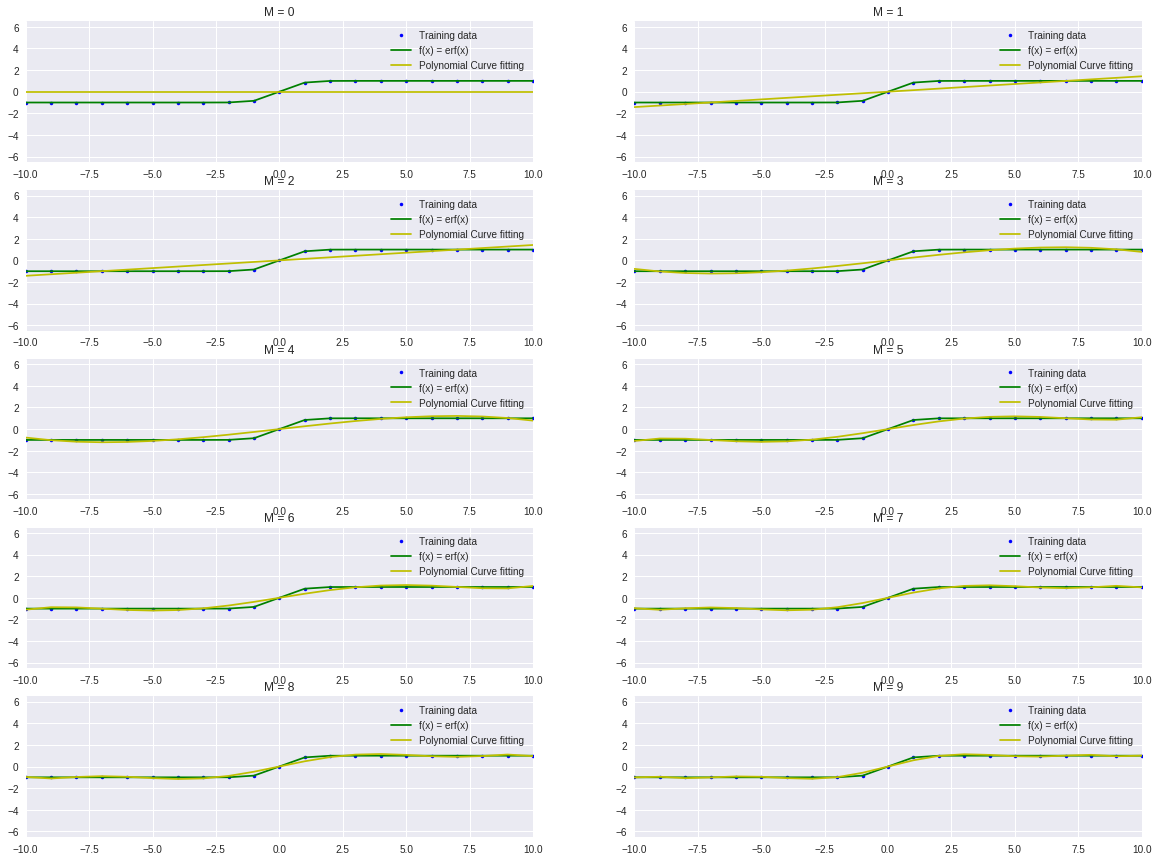

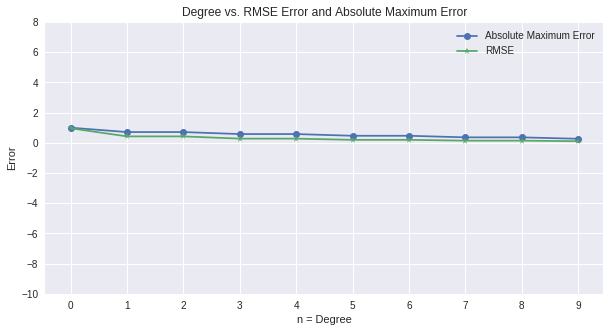

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sys
import time
import datetime
import os
import math
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import legend

plt.rcParams['figure.figsize'] = [20, 15]


# From Handbook of Mathematical Functions, formula 7.1.26.
def erf(x):
    # save the sign of x
    sign = 1 if x >= 0 else -1
    x = abs(x)

    # constants
    a1 =  0.254829592
    a2 = -0.284496736
    a3 =  1.421413741
    a4 = -1.453152027
    a5 =  1.061405429
    p  =  0.3275911

    # A&S formula 7.1.26
    t = 1.0/(1.0 + p*x)
    y = 1.0 - (((((a5*t + a4)*t) + a3)*t + a2)*t + a1)*t*math.exp(-x*x)
    return sign*y # erf(-x) = -erf(x)

def polynomial_fitted_y_values(x, w):
    x = [x ** j for j in np.arange(0, w.size)]
    wTx = w[:, np.newaxis].T.dot(x).T
    return wTx[:, 0]

def least_squares(M, x, t):
    x = np.array([x ** j for j in np.arange(0, M + 1)])
    return np.linalg.solve(x.dot(x.T), x.dot(t))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mean_absolute_error(predictions, targets):
  return np.absolute(predictions - targets).mean()

def absolute_error(predictions, targets):
  difference = predictions - targets
  return np.absolute(np.amax(difference))
  
def main():
  
    x = np.linspace(-10, 10, 21)
    
    t =  np.array([erf(xVal) for xVal in x])
    
    
    xs = np.linspace(-10, 10, 21)
    
    t_ideal = np.array([erf(xVal) for xVal in xs])
    
    l2_diff = []
    rms_diff = []
    mae_diff = []
    abs_errors = []

    M = np.arange(0, 10).reshape(-1)
    fig_row = np.ceil(M.shape[0] / 2)
    fig_col = np.ceil(len(M) / fig_row)
    fig = plt.figure()
    for i, m in enumerate(M):
        w = least_squares(m, x, t)
        fig.add_subplot(fig_row, fig_col, i + 1)
        plt.plot(x, t, 'b.', label='Training data')
        plt.plot(xs, t_ideal, 'g-', label='f(x) = erf(x)')
        # Compute Various errors here
        l2_norm = np.linalg.norm((t_ideal - polynomial_fitted_y_values(xs, w)), 2)
        rms_error = rmse(polynomial_fitted_y_values(xs, w), t_ideal)
        mae = mean_absolute_error(polynomial_fitted_y_values(xs, w), t_ideal)
        abs_error = absolute_error(polynomial_fitted_y_values(xs, w), t_ideal)
        
        rms_diff.append(rms_error)
        mae_diff.append(mae)
        abs_errors.append(abs_error)
        
        plt.plot(xs, polynomial_fitted_y_values(xs, w), 'y-', label='Polynomial Curve fitting')
        plt.legend()
        plt.title('M = {0}'.format(m))
        plt.xlim(-10, 10)
        plt.ylim(-6.5, 6.5)

    fig, ax = plt.subplots(figsize=(10, 5))   
    ax.plot(np.arange(0, 10), abs_errors, marker='o', label='Absolute Maximum Error')
    ax.plot(np.arange(0, 10), rms_diff, marker="*", label='RMSE')
    ax.set_title('Degree vs. RMSE Error and Absolute Maximum Error')
    ax.set_xlabel('n = Degree')
    ax.set_ylabel('Error')
    plt.legend()

    plt.yticks(np.arange(-10,10, 2))
    plt.xticks(np.arange(0,10,1))
    plt.show()

if __name__ == '__main__':
  main()

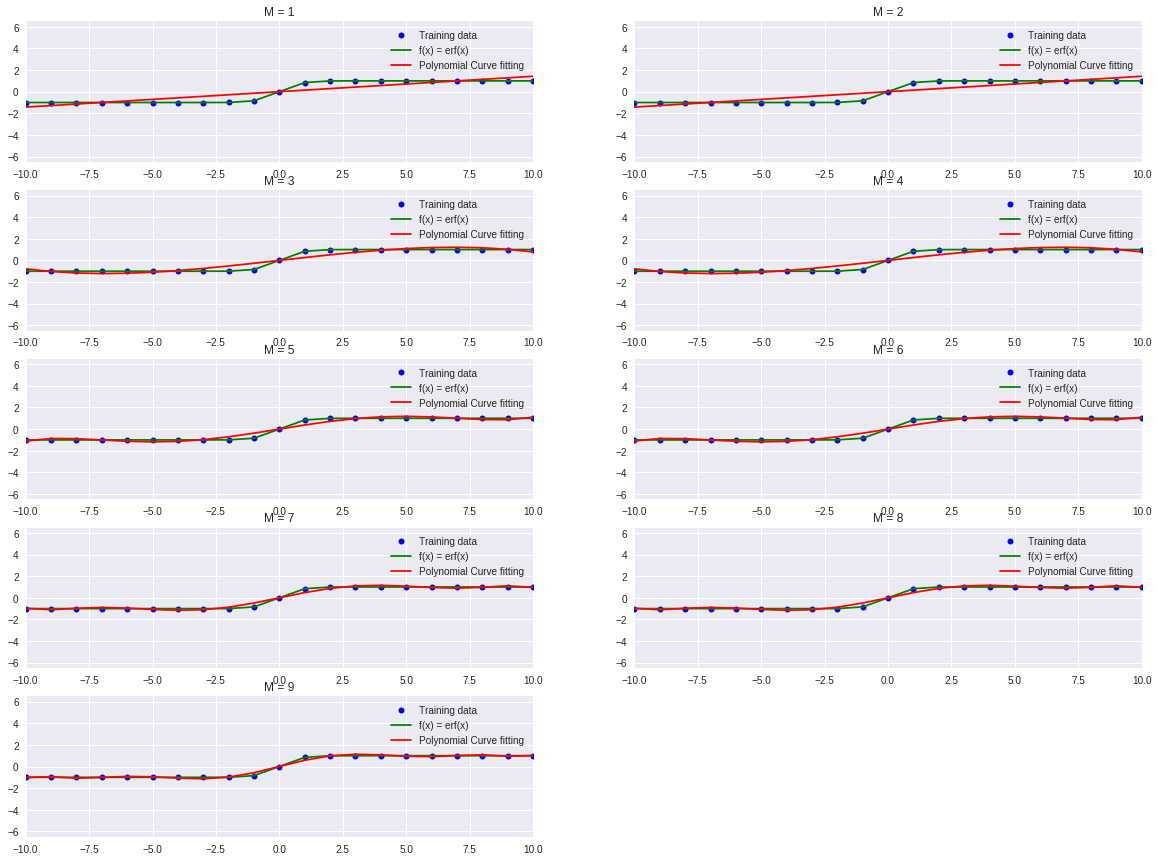

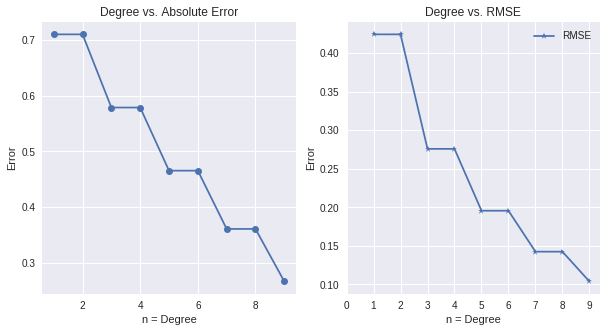

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

def polynomial_fitted_y_values(x, w):
    x = [x ** j for j in np.arange(0, w.size)]
    wTx = w[:, np.newaxis].T.dot(x).T
    return wTx[:, 0]


def least_squares(M, x, t):
        
    x_domain = np.array([x ** j for j in np.arange(0, M + 1)])
    xOdd = x_domain.copy()
    index = []
    for i in range(x_domain.shape[0]):
      if i % 2 == 0:
        index.append(i)
    if M == 0:
        xOdd[i] = np.nan
    else:
      xOdd = np.delete(x_domain, index, 0)
    
    return np.linalg.solve(xOdd.dot(xOdd.T), xOdd.dot(t))

def main():
  
    x = np.linspace(-10, 10, 21)
    t =  np.array([erf(xVal) for xVal in x])
    xs = np.linspace(-10, 10, 21)
    t_ideal = np.array([erf(xVal) for xVal in xs])
    
    l2_diff = []
    rms_diff = []
    abs_errors = []
       
    M = np.arange(1, 10).reshape(-1)
    fig_row = np.ceil(M.shape[0] / 2)
    fig_col = np.ceil(len(M) / fig_row)
    fig = plt.figure()
    for i, m in enumerate(M):
        index = []
        w = least_squares(m, x, t)
        # index for all the even coefficient
        index = np.arange(0, len(w))
        # padding w with zero's in the even coefficient position
        w = np.insert(w, index, 0) 
        rms_error = rmse(polynomial_fitted_y_values(xs, w), t_ideal)
        abs_error = absolute_error(polynomial_fitted_y_values(xs, w), t_ideal)

        # l2_norm = np.linalg.norm((t_ideal - polynomial_fitted_y_values(xs, w)), 2)

        # l2_diff.append(l2_norm)
        rms_diff.append(rms_error)
        abs_errors.append(abs_error)
        
        fig.add_subplot(fig_row, fig_col, i + 1)
        plt.plot(x, t, 'b.', label='Training data', markersize = 12)
        plt.plot(xs, t_ideal, 'g-', label='f(x) = erf(x)')
        plt.plot(xs, polynomial_fitted_y_values(xs, w), 'r-', label='Polynomial Curve fitting')
        plt.legend()
        plt.title('M = {0}'.format(m))
        plt.xlim(-10, 10)
        plt.ylim(-6.5, 6.5)
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
    ax1.plot(np.arange(1, 10), abs_errors, marker='o', label='Absolute Error')
    ax2.plot(np.arange(1, 10), rms_diff, marker="*", label='RMSE')
    ax1.set_title('Degree vs. Absolute Error')
    ax2.set_title('Degree vs. RMSE')
    ax1.set_xlabel('n = Degree')
    ax2.set_xlabel('n = Degree')
    ax1.set_ylabel('Error')
    ax2.set_ylabel('Error')
    plt.legend()

    plt.xticks(np.arange(0,10,1))
    plt.show()        

if __name__ == '__main__':
  main()